# Project 4: Heart Disease Prediction (Classification)

# Steps Covered -

1. Classification Fundamentals
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Feature Importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import xgboost as xgb
import os

In [ ]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.isnull().sum().sum()

np.int64(1759)

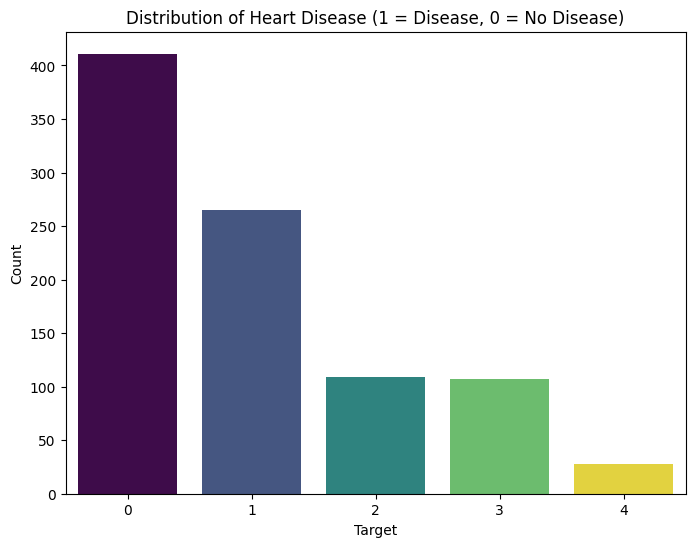

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

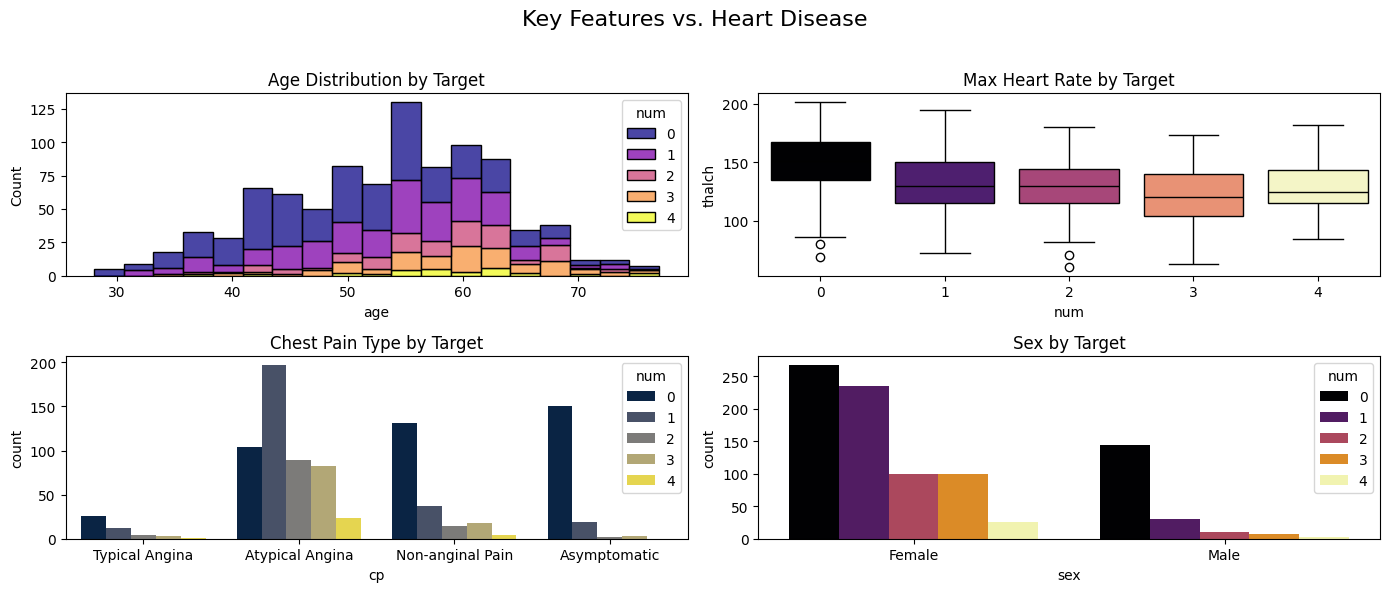

In [ ]:
#visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# INSIGHTS
1. people from age 50-60 are more likely to have heard issue
2. people who are Not sick having higher heard rate
3. Atypical Angina type chest pain means u have higher chance of heart attack
4. more females have heart issue

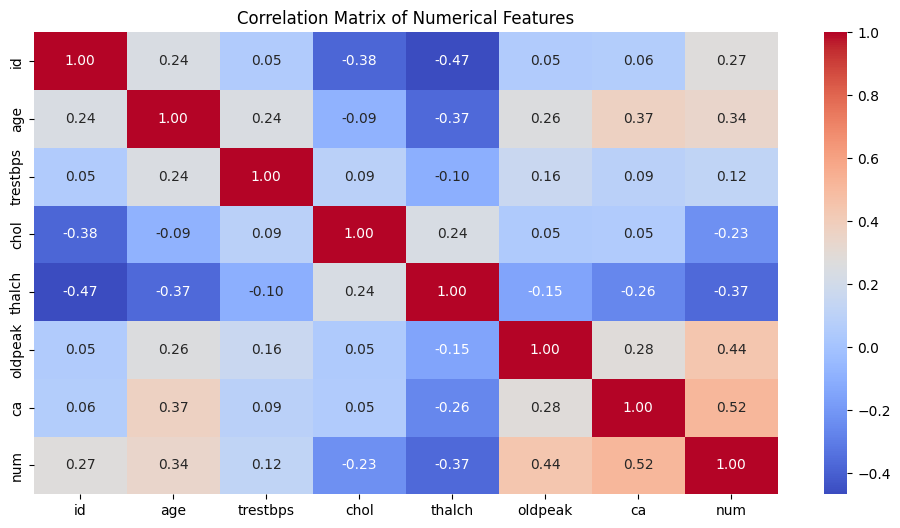

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**who has higher correlation?**

ca, age, ddpeak, chol

# Data Preprocessing

Steps?
1. **Separating features** (X) and target (y).


2. **Identifying categorical features** that need to be encoded.


3. **One-Hot Encoding** categorical features to convert them into a numerical format.


4. **Scaling numerical features** so they are on a similar scale.

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
#seperating features and target
X = df.drop('num', axis=1)
y = df['num']

X = X.drop(['id', 'dataset'], axis=1)

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Handling missing values (Imputation)

In [ ]:
#Numerical → median
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])

# Categorical → most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

In [ ]:
#One-Hot Encode-ing categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

encoded_cat = encoder.fit_transform(X[categorical_features])

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(categorical_features),
    index=X.index
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_num = scaler.fit_transform(X[numerical_features])

scaled_num_df = pd.DataFrame(
    scaled_num,
    columns=numerical_features,
    index=X.index
)

In [ ]:
#combining all features
X_final = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# Training --

In [ ]:
#Logistic Regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)


print("Model trained successfully.")

Model trained successfully.


In [ ]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_num = scaler.fit_transform(X[numerical_features])

scaled_num_df = pd.DataFrame(
    scaled_num,
    columns=numerical_features,
    index=X.index
)
X_final = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation --

In [ ]:
print("---- Logistic Regression Results ----")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print("----- SVM Classification Results -----")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

---- Logistic Regression Results ----
Accuracy: 0.5380434782608695
Confusion Matrix:
 [[64 11  0  0  0]
 [22 29  0  3  0]
 [ 3 16  2  4  0]
 [ 5  9  7  4  1]
 [ 0  1  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76        75
           1       0.44      0.54      0.48        54
           2       0.20      0.08      0.11        25
           3       0.31      0.15      0.21        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.33      0.32      0.31       184
weighted avg       0.48      0.54      0.50       184

----- SVM Classification Results -----
Accuracy: 0.5380434782608695
Confusion Matrix:
 [[68  6  1  0  0]
 [23 26  2  3  0]
 [ 3 14  3  5  0]
 [ 5 16  3  2  0]
 [ 1  0  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78        75

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**which model did better?**

In [ ]:
from sklearn.metrics import f1_score

print("Logistic Regression F1:", f1_score(y_test, y_pred_lr, average='weighted'))
print("SVM F1:", f1_score(y_test, y_pred_svm, average='weighted'))

Logistic Regression F1: 0.495082662599385
SVM F1: 0.4864954740674775


In [ ]:
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

LR Confusion Matrix:
 [[64 11  0  0  0]
 [22 29  0  3  0]
 [ 3 16  2  4  0]
 [ 5  9  7  4  1]
 [ 0  1  1  2  0]]
SVM Confusion Matrix:
 [[68  6  1  0  0]
 [23 26  2  3  0]
 [ 3 14  3  5  0]
 [ 5 16  3  2  0]
 [ 1  0  1  2  0]]


# Insights
	•	Both models perform well on Class 0 (majority class).
	•	Both struggle on minority classes (2, 3, 4).
	•	Logistic Regression has slightly better recall and F1 for classes 1–3.
	•	Class 4 is not learned by either model (very small support = 4).


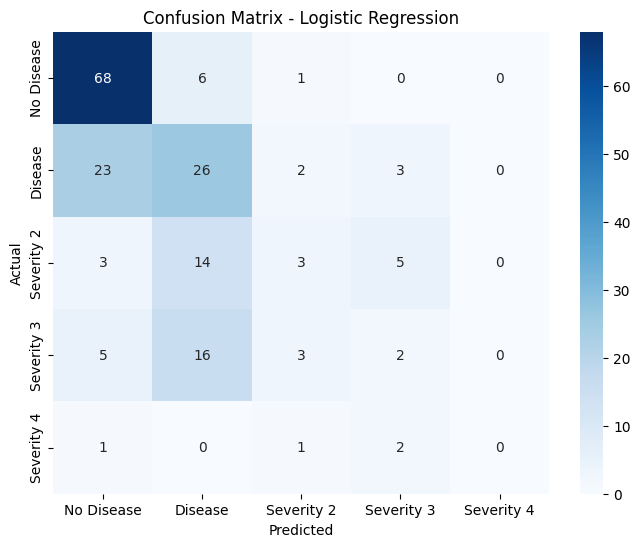

In [ ]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Submission Criteria


1. Completed Exploratory Data Analysis (EDA): Performed all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.


2. Model Training without Pipelines: Trained on 2 classification model directly (**LOGISTIC REGRESSION AND SVM**), without using the Scikit-Learn Pipeline object for preprocessing and model chaining.

--> Analysed the **Classification Report** and found that Logistic Regression did better than SVM.


3. Submitting the Entire Notebook